#DA 204o Data Science in Practice

Project: Online New Popularity

Authors: Rajat Chaudhary, Sonu Goyal, Srinivas Shavukapu Kattegummula, Yuvaraj G
email: rajatc@iisc.ac.in, sonugoyal@iisc.ac.in, srinivassk@iisc.ac.in, yuvarajgopi@iisc.ac.in

# 00-Prerequisities
## Libraries Required and Import of all Libraries

In [ ]:
#Libraries Required and Import of all Libraries
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#Regression Algorithm models
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


#Classification Algorithm models
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB





from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import FunctionTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.base import clone


from sklearn.inspection import permutation_importance

# 01-data-collection

In [ ]:
#01-data-collection
# # Paths
BASE_PATH = Path("/Users/yuvaraj/Desktop/IISc/01_Semester/DA 204o Data Science in Practice/Project/Input")
BASE_FILE = BASE_PATH / "OnlineNewsPopularity.csv"


In [3]:
df = pd.read_csv(BASE_FILE, low_memory=False)


In [4]:
print(df.head())
print("Shape of dataset",df.shape)

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

Attribute Information:
     0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

# 02-data-preprocessing

In [ ]:
#02-data-preprocessing
# Exploring the data for Number and Percentage of "NaN", Data type of column and Column values & its grouping

# User defined function to check above mentioned items for all columns
def value_counts_summary(df):
  summary = {}
  for col in df.columns:
    print("-"*80)
    null_count=df[col].isna().sum()
    null_percentage=null_count/len(df)*100
    print("Column : ",col,";   NA : ",null_count,";   NA_% : ",round(null_percentage,2), ";   Data_Type : ",df[col].dtype)
    summary[col] = df[col].value_counts(dropna=False)
    print(summary[col])
    print("-"*80)


value_counts_summary(df)

--------------------------------------------------------------------------------
Column :  url ;   NA :  0 ;   NA_% :  0.0 ;   Data_Type :  object
url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                          1
http://mashable.com/2014/06/05/congress-bergdahl-swap/                                1
http://mashable.com/2014/06/05/barnes-noble-nook-samsung-galaxy-tab-4/                1
http://mashable.com/2014/06/05/beastie-boys-awarded-1-7-million-in-copyright-case/    1
http://mashable.com/2014/06/05/beats-world-cup-ad/                                    1
                                                                                     ..
http://mashable.com/2013/09/18/matthew-cordle-youtube-guilty/                         1
http://mashable.com/2013/09/18/memoir-app/                                            1
http://mashable.com/2013/09/18/microsoft-internet-explorer-11-update/                 1
http://mashable.com/2013/09/18/most-expensive-video-games

Observation: No NAN values are found in the model

In [6]:
#Remove whitespace in columns headers

def trim_column_names(df):
    # Print a sample before to see the issue
    print("Before Trimming :", df.columns[:].tolist())
    
    # The actual cleaning line: .str.strip() removes spaces from both ends
    df.columns = df.columns.str.strip()
    
    # Verify the change
    print("After Trimming: ", df.columns[:].tolist())
    
    return df

# Run the function
df = trim_column_names(df)

Before Trimming : ['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_

In [7]:
def check_column_types(df):
    print(f"{'COLUMN NAME':<30} | {'DATA TYPE CATEGORY':<20}")
    print("-" * 55)
    
    for col in df.columns:
        # Check if column is numeric (Integers or Floats)
        if pd.api.types.is_numeric_dtype(df[col]):
            col_type = "Numeric"
        # Check if column is object/string/categorical
        elif pd.api.types.is_string_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
            col_type = "String / Object"
        else:
            col_type = "Other (Time/Bool)"
            
        print(f"{col:<30} | {col_type:<20}")

# Run the function
check_column_types(df)

COLUMN NAME                    | DATA TYPE CATEGORY  
-------------------------------------------------------
url                            | String / Object     
timedelta                      | Numeric             
n_tokens_title                 | Numeric             
n_tokens_content               | Numeric             
n_unique_tokens                | Numeric             
n_non_stop_words               | Numeric             
n_non_stop_unique_tokens       | Numeric             
num_hrefs                      | Numeric             
num_self_hrefs                 | Numeric             
num_imgs                       | Numeric             
num_videos                     | Numeric             
average_token_length           | Numeric             
num_keywords                   | Numeric             
data_channel_is_lifestyle      | Numeric             
data_channel_is_entertainment  | Numeric             
data_channel_is_bus            | Numeric             
data_channel_is_socmed    

Dropping unwanted columns and Splitting the dataset into train(80%) and test(20%)

In [8]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [9]:
cols_to_drop = ['shares', 'url', 'timedelta']
# Ensure we only drop columns that actually exist in the dataframe
existing_cols_to_drop = [c for c in cols_to_drop if c in df.columns]

X = df.drop(existing_cols_to_drop, axis=1)

# y contains ONLY the target
y = df['shares']

# (Optional) If doing classification as suggested previously:
# y = (df[target_column] > 1400).astype(int)

# 3. Perform the Split
# test_size=0.2 means 20% of data goes to Test, 80% to Train.
# random_state=42 ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [10]:
X_train.shape

(31715, 58)

In [11]:
X_test.shape

(7929, 58)

In [12]:
print("X train", X_train.head())
print("X test", X_test.head())
print("y train", y_train.head())
print("y test",y_test.head())

X train        n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
19837            15.0             628.0         0.509709               1.0   
904              11.0             409.0         0.519608               1.0   
23876             7.0             345.0         0.609329               1.0   
22966            11.0             217.0         0.580189               1.0   
4705             13.0             123.0         0.739837               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
19837                  0.645084       14.0             1.0       1.0   
904                    0.657480        2.0             0.0       1.0   
23876                  0.783920        5.0             2.0       1.0   
22966                  0.775000        8.0             2.0       3.0   
4705                   0.887324        3.0             0.0       1.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
19837         0.0  

In [13]:
def get_min_max_only(df):
    print(f"{'COLUMN NAME':<30} | {'MIN':<10} | {'MAX':<10}")
    print("-" * 60)
    
    for col in df.columns:
        # Only process numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            min_val = df[col].min()
            max_val = df[col].max()
            
            # Print in a aligned row format
            print(f"{col:<30} | {min_val:<10} | {max_val:<10}")

# Run the function
get_min_max_only(X_train)

COLUMN NAME                    | MIN        | MAX       
------------------------------------------------------------
n_tokens_title                 | 2.0        | 23.0      
n_tokens_content               | 0.0        | 7413.0    
n_unique_tokens                | 0.0        | 701.0     
n_non_stop_words               | 0.0        | 1042.0    
n_non_stop_unique_tokens       | 0.0        | 650.0     
num_hrefs                      | 0.0        | 304.0     
num_self_hrefs                 | 0.0        | 116.0     
num_imgs                       | 0.0        | 128.0     
num_videos                     | 0.0        | 91.0      
average_token_length           | 0.0        | 8.04153354633
num_keywords                   | 1.0        | 10.0      
data_channel_is_lifestyle      | 0.0        | 1.0       
data_channel_is_entertainment  | 0.0        | 1.0       
data_channel_is_bus            | 0.0        | 1.0       
data_channel_is_socmed         | 0.0        | 1.0       
data_channel_is_tech    

Observation of min max value:

Observation 1: (cleaning required)
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content

These are rate columns, so the values cannot be more than 1.


Observation 2:(cleaning required)
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)

These are share columns, so the values cannot be less Zero

Observation 3:(no cleaning required)
"Polarity" must be ranging from -1 to +1 
    -1 states it is negative polarity
    +1 states it is positive polarity

In [14]:
#Observation 1 : Treat the values more than 1

rate_cols = ['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']

print(f"{'COLUMN':<30} | {'ROWS > 1'}")
print("-" * 45)

for col in rate_cols:
    # 2. Count rows where the value is strictly greater than 1
    error_count = X_train[X_train[col] > 1].shape[0]
    
    print(f"{col:<30} | {error_count}")

# 3. View the actual bad data (optional)
# This lets you see if the value is something crazy like '700'
bad_data = X_train[X_train['n_unique_tokens'] > 1]
print("\nbad data rows are :")
print(bad_data[rate_cols])

COLUMN                         | ROWS > 1
---------------------------------------------
n_unique_tokens                | 1
n_non_stop_words               | 1
n_non_stop_unique_tokens       | 1

bad data rows are :
       n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens
31037            701.0            1042.0                     650.0


In [15]:
# List of rate columns to fix
rate_cols = ['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']

print(f"{'COLUMN':<30} | {'REPLACED':<8} | {'OLD MEAN':<10} | {'IMPUTED VAL':<11} | {'NEW MEAN':<10}")
print("-" * 80)

for col in rate_cols:
    # 1. Capture Old Mean (Includes the massive outliers > 1)
    old_mean = X_train[col].mean()
    
    # 2. Calculate the 'Clean Mean' (Exclude values > 1) -> This is our fill value
    clean_mean = X_train.loc[X_train[col] <= 1, col].mean()
    
    # 3. Identify and Count the bad rows
    mask_bad = X_train[col] > 1
    count_bad = mask_bad.sum()
    
    # 4. Replace bad values with the Clean Mean
    if count_bad > 0:
        X_train.loc[mask_bad, col] = clean_mean
        
        # 5. Calculate New Mean
        new_mean = X_train[col].mean()
        
        print(f"{col:<30} | {count_bad:<8} | {old_mean:<10.4f} | {clean_mean:<11.4f} | {new_mean:<10.4f}")
    else:
        print(f"{col:<30} | {'0':<8} | {old_mean:<10.4f} | {'N/A':<11} | {old_mean:<10.4f}")

# Verification step to ensure no values > 1 remain
print("\n" + "-"*80)
print("Verification (Should be 0 rows > 1):")
for col in rate_cols:
    remaining_errors = X_train[X_train[col] > 1].shape[0]
    print(f"{col:<30} | {remaining_errors}")

COLUMN                         | REPLACED | OLD MEAN   | IMPUTED VAL | NEW MEAN  
--------------------------------------------------------------------------------
n_unique_tokens                | 1        | 0.5520     | 0.5299      | 0.5299    
n_non_stop_words               | 1        | 1.0028     | 0.9700      | 0.9700    
n_non_stop_unique_tokens       | 1        | 0.6930     | 0.6725      | 0.6725    

--------------------------------------------------------------------------------
Verification (Should be 0 rows > 1):
n_unique_tokens                | 0
n_non_stop_words               | 0
n_non_stop_unique_tokens       | 0


In [16]:
# List of keyword (share) columns to check
kw_cols = [
    'kw_min_min', 'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max', 'kw_avg_max',
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'
]

total_rows = len(X_train)

print(f"{'COLUMN NAME':<30} | {'COUNT < 0':<10} | {'% OF TOTAL':<10}")
print("-" * 60)

# 1. Count rows and calculate percentage per column
for col in kw_cols:
    neg_count = X_train[X_train[col] < 0].shape[0]
    neg_pct = (neg_count / total_rows) * 100
    
    # Print with 2 decimal places for percentage
    print(f"{col:<30} | {neg_count:<10} | {neg_pct:.2f}%")

# 2. Show the top 5 rows that have negative values
condition = (X_train[kw_cols] < 0).any(axis=1)
bad_rows = X_train[condition]

print(f"\nTotal unique rows with at least one negative value: {bad_rows.shape[0]}")
print("\nTop 5 Rows with negative values:")
print(bad_rows[kw_cols].head(5))

COLUMN NAME                    | COUNT < 0  | % OF TOTAL
------------------------------------------------------------
kw_min_min                     | 18399      | 58.01%
kw_max_min                     | 0          | 0.00%
kw_avg_min                     | 652        | 2.06%
kw_min_max                     | 0          | 0.00%
kw_max_max                     | 0          | 0.00%
kw_avg_max                     | 0          | 0.00%
kw_min_avg                     | 6          | 0.02%
kw_max_avg                     | 0          | 0.00%
kw_avg_avg                     | 0          | 0.00%

Total unique rows with at least one negative value: 18399

Top 5 Rows with negative values:
       kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  \
19837        -1.0       677.0  300.512857      7600.0    843300.0   
23876        -1.0       165.0   96.800000      7200.0    843300.0   
22966        -1.0       715.0  198.431667         0.0    843300.0   
36993        -1.0        49.0   11.500000   

"kw_min_min" has bad values more than ~58% so we will not consider that further analysis, rest of the columns - will replace it with mean

In [17]:
# List of columns to fix
kw_cols = [
    'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max', 'kw_avg_max',
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'
]

print(f"{'COLUMN':<25} | {'REPLACED':<8} | {'OLD MEAN':<10} | {'IMPUTED VAL':<11} | {'NEW MEAN':<10}")
print("-" * 75)

for col in kw_cols:
    # 1. Capture Old Mean (Includes the -1s, so it will be lower)
    old_mean = X_train[col].mean()
    
    # 2. Calculate the 'Clean Mean' (Exclude -1s) -> This is our fill value
    clean_mean = X_train.loc[X_train[col] >= 0, col].mean()
    
    # 3. Identify and Count the bad rows
    mask_neg = X_train[col] < 0
    count_neg = mask_neg.sum()
    
    # 4. Replace negative values with the Clean Mean
    if count_neg > 0:
        X_train.loc[mask_neg, col] = clean_mean
        
        # 5. Calculate New Mean (Should be equal to Clean Mean if all -1s are filled)
        new_mean = X_train[col].mean()
        
        print(f"{col:<25} | {count_neg:<8} | {old_mean:<10.2f} | {clean_mean:<11.2f} | {new_mean:<10.2f}")
    else:
        print(f"{col:<25} | {'0':<8} | {old_mean:<10.2f} | {'N/A':<11} | {old_mean:<10.2f}")

COLUMN                    | REPLACED | OLD MEAN   | IMPUTED VAL | NEW MEAN  
---------------------------------------------------------------------------
kw_max_min                | 0        | 1175.48    | N/A         | 1175.48   
kw_avg_min                | 652      | 316.06     | 322.72      | 322.72    
kw_min_max                | 0        | 13578.15   | N/A         | 13578.15  
kw_max_max                | 0        | 753332.38  | N/A         | 753332.38 
kw_avg_max                | 0        | 259157.53  | N/A         | 259157.53 
kw_min_avg                | 6        | 1120.29    | 1120.50     | 1120.50   
kw_max_avg                | 0        | 5681.05    | N/A         | 5681.05   
kw_avg_avg                | 0        | 3140.96    | N/A         | 3140.96   


# 03-EDA

Visual Check: The Grid Plot

Statistical Check: Q-Q Plots

Generating Q-Q plots for all 58 columns using full data...


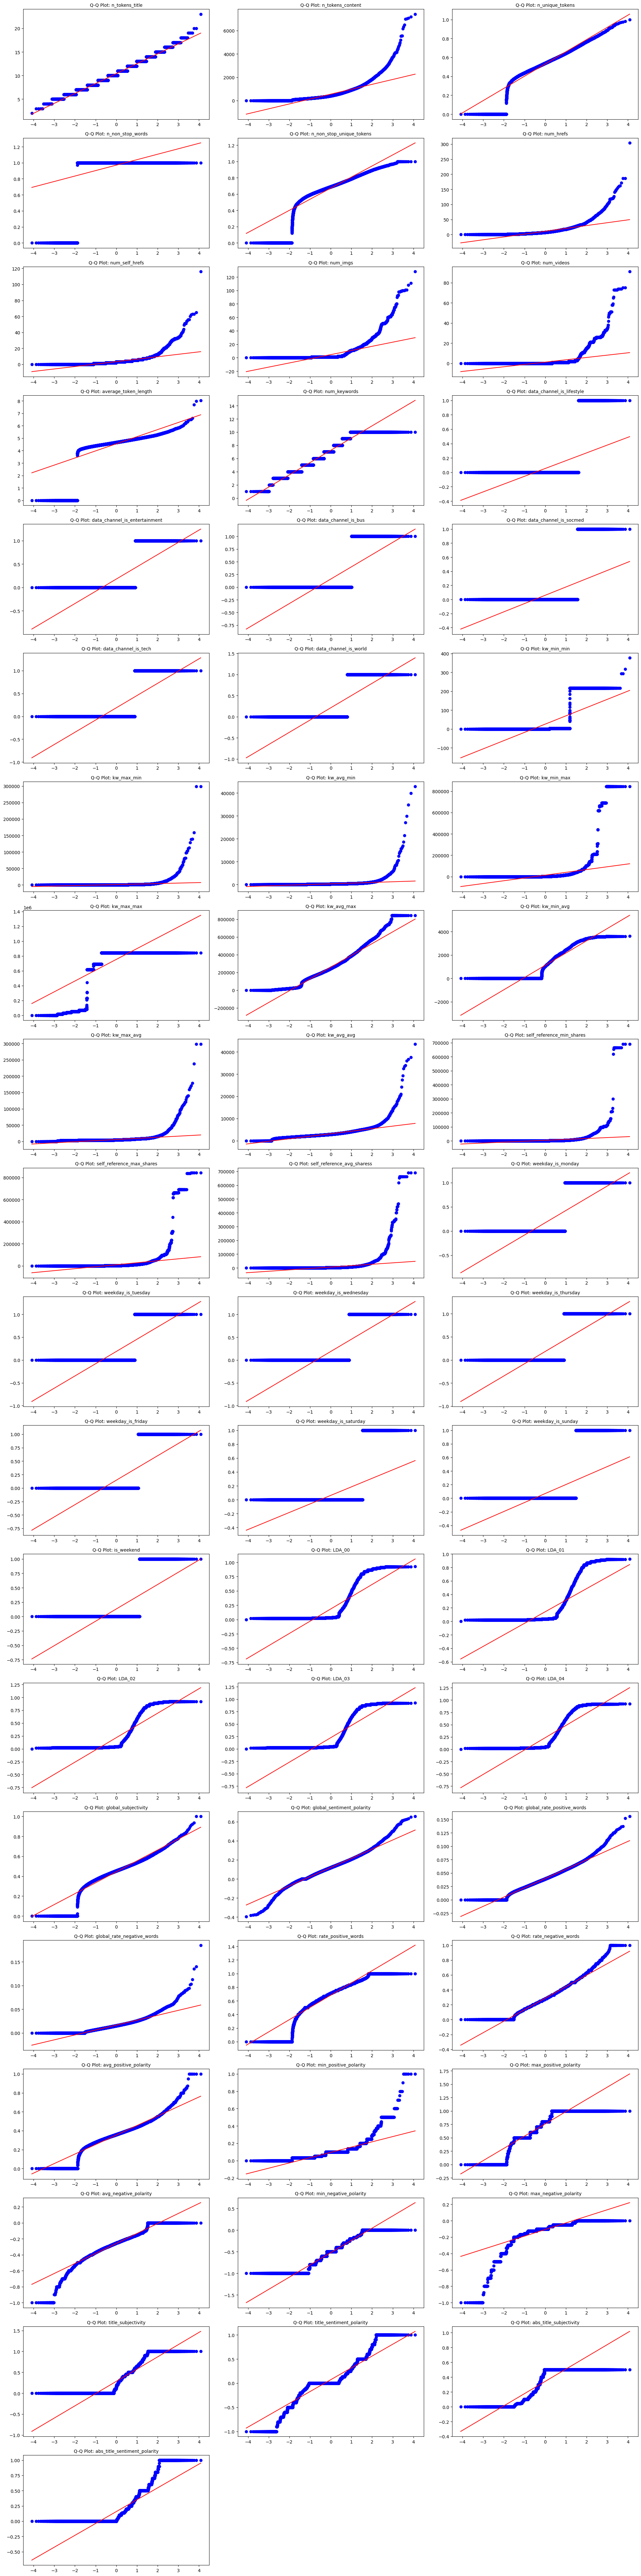

In [18]:
def plot_full_qq(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    total_cols = len(numeric_cols)
    
    cols_per_row = 3
    rows = math.ceil(total_cols / cols_per_row)
    
    print(f"Generating Q-Q plots for all {total_cols} columns using full data...")
    
    plt.figure(figsize=(20, 4 * rows))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols_per_row, i + 1)
        
        # This uses the specific column from the full dataframe 'df[col]'
        stats.probplot(df[col], dist="norm", plot=plt)
        
        plt.title(f"Q-Q Plot: {col}", fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

# Run on the full 'train' dataframe
plot_full_qq(X_train)

Observation:
Very few features are having linear relationship and most of the features are non linear, which gives the right direction not to chose linear regression.

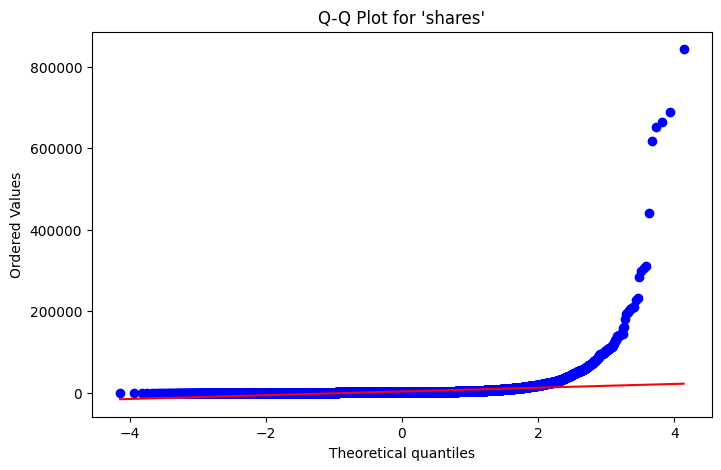

In [19]:

def check_normality_qq(df, col_name):
    plt.figure(figsize=(8, 5))
    
    # Generate the Q-Q plot
    stats.probplot(df[col_name], dist="norm", plot=plt)
    
    plt.title(f"Q-Q Plot for '{col_name}'")
    plt.show()

# Example: Check the target variable or a keyword feature
if 'shares' in df.columns:
    check_normality_qq(df, 'shares')
else:
    # Check a specific feature if 'shares' is not in X_train
    check_normality_qq(X_train, 'n_tokens_content')

Checking the Correlation score to understand the relation between Features(X_Train) vs Target(Shares- y_train)

In [20]:
def get_correlation_table(X, y):
    # 1. Ensure y is a Series with a name
    target_name = y.name if hasattr(y, 'name') else 'shares'
    
    # 2. Select only numeric columns from X
    numeric_cols = X.select_dtypes(include=['number']).columns
    
    # 3. Calculate correlations
    data = []
    for col in numeric_cols:
        # Calculate Pearson Correlation (r)
        r = X[col].corr(y)
        
        # --- LOGIC FOR STRENGTH (How reliable?) ---
        abs_r = abs(r)
        if abs_r >= 0.5:
            strength = "STRONG"
        elif abs_r >= 0.3:
            strength = "Moderate"
        elif abs_r >= 0.1:
            strength = "Weak"
        else:
            strength = "No Relation"
            
        # --- LOGIC FOR DIRECTION (Which way?) ---
        if r > 0:
            direction = "Positive"
        else:
            direction = "Negative"

        data.append({
            'Feature': col,
            'Correlation': r,
            'Strength': strength,
            'Direction': direction,  # <--- New Column
            'Abs_Correlation': abs_r # Helper for sorting
        })
    
    # 4. Create DataFrame and Sort
    # We sort by 'Abs_Correlation' to see the most important features at the top
    corr_df = pd.DataFrame(data)
    corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)
    
    # 5. Drop the helper column for cleaner display
    final_df = corr_df.drop(columns=['Abs_Correlation'])
    
    return final_df

# Run the function
correlation_table = get_correlation_table(X_train, y_train)

# Display the top 80 features as requested
pd.set_option('display.max_rows', 100) # Ensure pandas prints all rows
print(correlation_table.head(80))

                          Feature  Correlation     Strength Direction
25                     kw_avg_avg     0.106740         Weak  Positive
40                         LDA_03     0.085382  No Relation  Positive
24                     kw_max_avg     0.061870  No Relation  Positive
39                         LDA_02    -0.060120  No Relation  Negative
16          data_channel_is_world    -0.049776  No Relation  Negative
5                       num_hrefs     0.046526  No Relation  Positive
28     self_reference_avg_sharess     0.044519  No Relation  Positive
22                     kw_avg_max     0.041734  No Relation  Positive
26      self_reference_min_shares     0.040790  No Relation  Positive
27      self_reference_max_shares     0.039183  No Relation  Positive
23                     kw_min_avg     0.037665  No Relation  Positive
7                        num_imgs     0.037407  No Relation  Positive
42            global_subjectivity     0.032716  No Relation  Positive
18                  

Observation:

Correlation value:
if Correlation > 0	(+)	Positive --> Increasing this feature makes shares go UP.
else	            (-)	Negative --> Increasing this feature makes shares go DOWN.

This will be useful in the final model contribution score.

Plotting 58 scatter plots against 'shares'...


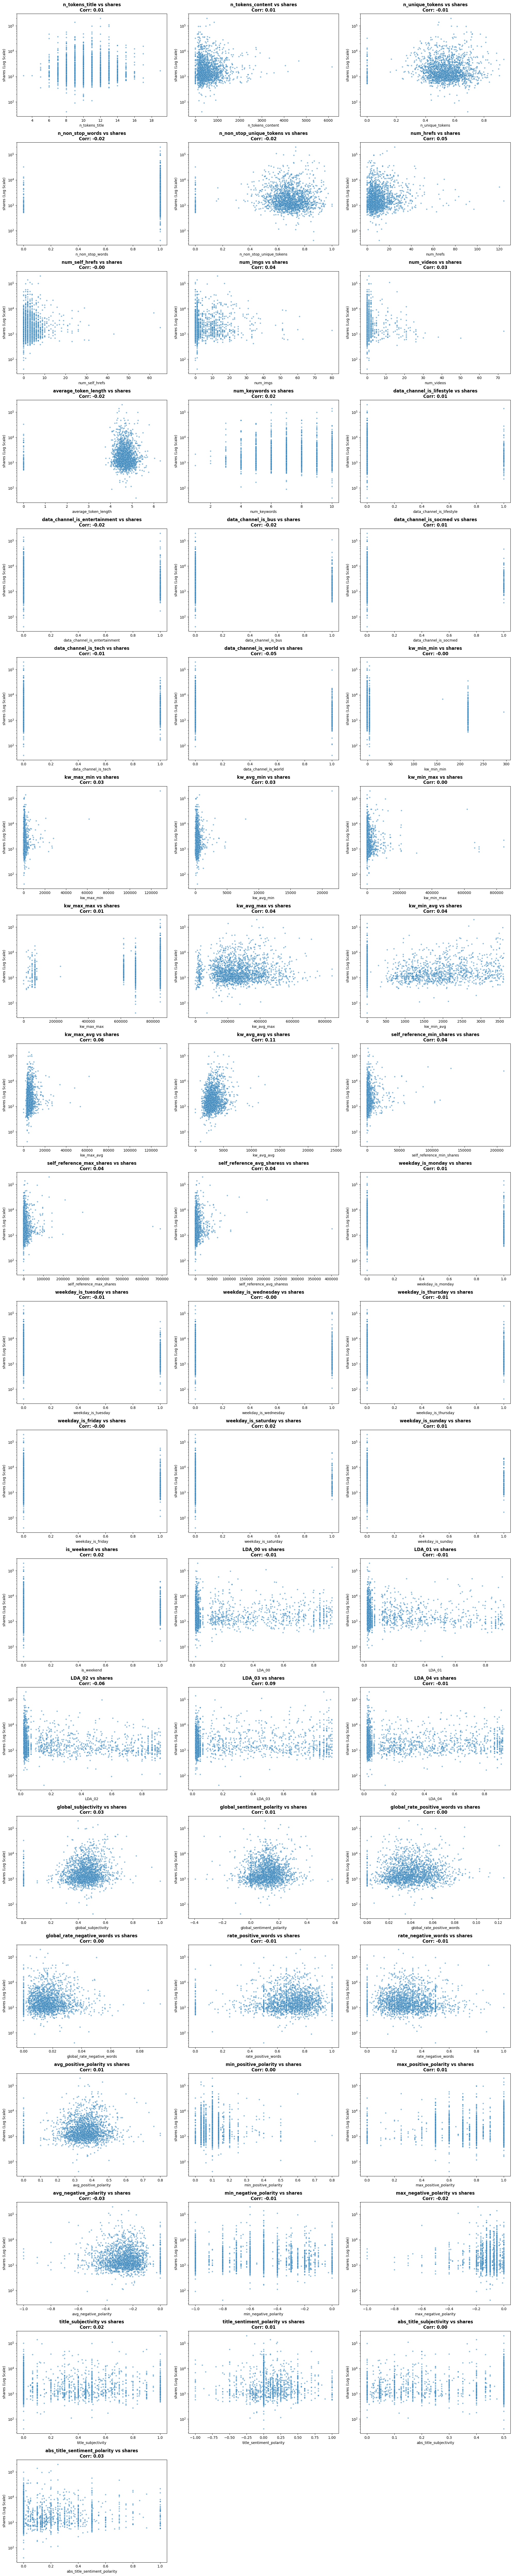

In [21]:
def plot_relations_split(X, y):
    # 1. Create a temporary dataframe for plotting
    # We copy X so we don't accidentally modify your real training data
    plot_df = X.copy()
    
    # Add the target column to this temporary dataframe
    # We assume y is a Series. If it's a dataframe, we use .iloc[:, 0]
    target_name = y.name if hasattr(y, 'name') else 'shares'
    plot_df[target_name] = y
    
    # 2. Select numeric columns (excluding the target we just added)
    numeric_cols = X.select_dtypes(include=['number']).columns
    
    # 3. Sample for speed (2,000 points is enough to see the shape)
    if len(plot_df) > 2000:
        sample_df = plot_df.sample(2000, random_state=42)
    else:
        sample_df = plot_df
        
    # Grid Setup
    cols_per_row = 3
    rows = math.ceil(len(numeric_cols) / cols_per_row)
    
    print(f"Plotting {len(numeric_cols)} scatter plots against '{target_name}'...")
    
    plt.figure(figsize=(20, 5 * rows))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols_per_row, i + 1)
        
        # 4. Scatter Plot
        sns.scatterplot(x=sample_df[col], y=sample_df[target_name], alpha=0.5, s=15)
        
        # 5. Log Scale for Target (Essential for 'shares')
        plt.yscale('log')
        
        # 6. Calculate Correlation
        corr_score = plot_df[col].corr(plot_df[target_name])
        
        plt.title(f"{col} vs {target_name}\nCorr: {corr_score:.2f}", fontsize=12, fontweight='bold')
        plt.ylabel(f"{target_name} (Log Scale)")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Usage: Pass your split variables here
plot_relations_split(X_train, y_train)

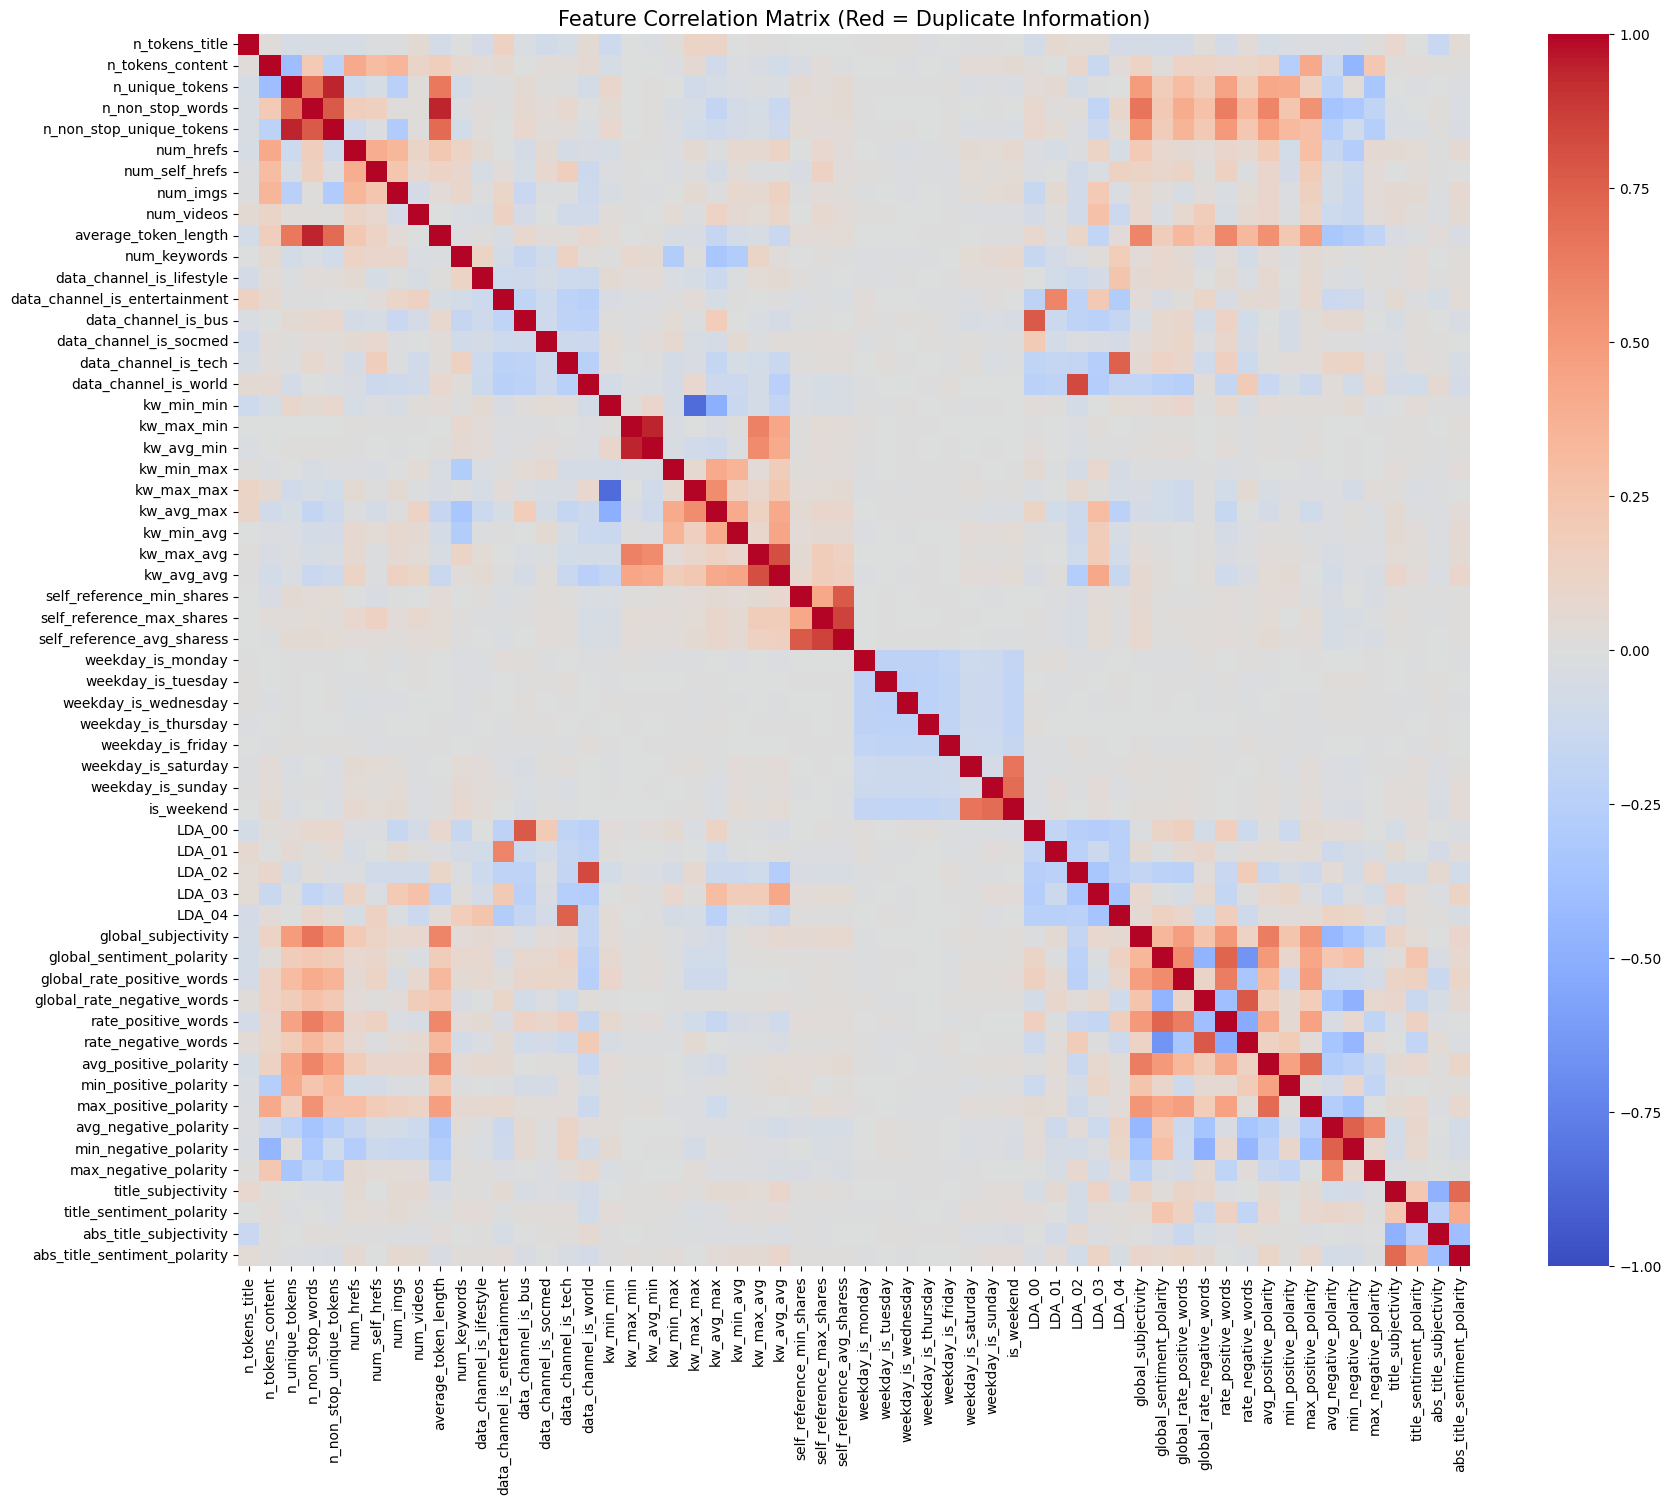

In [22]:
def plot_feature_heatmap(X):
    # Select only numeric columns
    numeric_df = X.select_dtypes(include=['number'])
    
    # Calculate Correlation Matrix
    corr_matrix = numeric_df.corr()
    
    # Setup Plot
    plt.figure(figsize=(20, 16))
    
    # Draw Heatmap
    # vmin=-1, vmax=1 ensures the colors are balanced
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True)
    
    plt.title("Feature Correlation Matrix (Red = Duplicate Information)", fontsize=15)
    plt.show()

# This might look like a "modern art" painting because of 60 columns
plot_feature_heatmap(X_train)

Observation: Red box near the diagonal says that the features are duplicate 

Since the Target(shares) is numeric and it is very discontinuous so try to understand the bins

In [23]:
def count_shares_in_ranges(y, bin_size=50000):
    # 1. Define the bins
    max_val = y.max()
    # Create bins from 0 up to max + padding
    bins = range(0, int(max_val) + bin_size * 2, bin_size)
    
    # 2. Cut the data
    y_binned = pd.cut(y, bins=bins, right=False)
    
    # 3. Count
    counts = y_binned.value_counts().sort_index()
    counts_active = counts[counts > 0]
    
    print(f"Distribution of Shares (Bin Size: {bin_size:,})")
    print("-" * 65)
    print(f"{'RANGE':<30} | {'COUNT':<10} | {'% OF TOTAL'}")
    print("-" * 65)
    
    total = len(y)
    
    for interval, count in counts_active.items():
        range_str = f"{int(interval.left):,} - {int(interval.right):,}"
        percent = (count / total) * 100
        
        # Highlight buckets with significant data
        marker = " <--- MASSIVE" if percent > 50 else ""
        
        print(f"{range_str:<30} | {count:<10} | {percent:.4f}%{marker}")

# Run with the new 50,000 bin size
print("TRAINING SET DISTRIBUTION:")
count_shares_in_ranges(y_train, bin_size=50000)

print("\n" + "="*65 + "\n")

print("TEST SET DISTRIBUTION:")
count_shares_in_ranges(y_test, bin_size=50000)

TRAINING SET DISTRIBUTION:
Distribution of Shares (Bin Size: 50,000)
-----------------------------------------------------------------
RANGE                          | COUNT      | % OF TOTAL
-----------------------------------------------------------------
0 - 50,000                     | 31551      | 99.4829% <--- MASSIVE
50,000 - 100,000               | 114        | 0.3595%
100,000 - 150,000              | 30         | 0.0946%
150,000 - 200,000              | 6          | 0.0189%
200,000 - 250,000              | 7          | 0.0221%
250,000 - 300,000              | 1          | 0.0032%
300,000 - 350,000              | 1          | 0.0032%
400,000 - 450,000              | 1          | 0.0032%
600,000 - 650,000              | 1          | 0.0032%
650,000 - 700,000              | 2          | 0.0063%
800,000 - 850,000              | 1          | 0.0032%


TEST SET DISTRIBUTION:
Distribution of Shares (Bin Size: 50,000)
-----------------------------------------------------------------
R

# 04-Modeling

## NEWS Popularity taggging

In [24]:
# 1. Calculate the News Popularity levels based on Percentiles
# 50th (Median), 95th (Top 5%), 99th (Top 1%)
p50 = np.percentile(y_train, 50)
p95 = np.percentile(y_train, 95)
p99 = np.percentile(y_train, 99)

print(f"--- DYNAMIC THRESHOLDS (Calculated from Training Data) ---")
print(f"Niche (< 50%):       0 to {int(p50):,} shares")
print(f"Performer (50-95%):  {int(p50):,} to {int(p95):,} shares")
print(f"Trending (95-99%):   {int(p95):,} to {int(p99):,} shares")
print(f"Viral (> 99%):       > {int(p99):,} shares")

--- DYNAMIC THRESHOLDS (Calculated from Training Data) ---
Niche (< 50%):       0 to 1,400 shares
Performer (50-95%):  1,400 to 10,900 shares
Trending (95-99%):   10,900 to 32,186 shares
Viral (> 99%):       > 32,186 shares


Dynamically tagging the Test and Train data with NEWS popularity

In [25]:
def preview_tier_counts(y, dataset_name="Training Set"):
    # 1. Calculate Dynamic Thresholds (Percentiles)
    # We always calculate these from the input 'y' to see the specific distribution
    p50 = np.percentile(y, 50)
    p95 = np.percentile(y, 95)
    p99 = np.percentile(y, 99)
    
    # 2. Define Bins and Labels
    # Bins: [0 to Median], [Median to 95%], [95% to 99%], [> 99%]
    bins = [-1, p50, p95, p99, np.inf]
    labels = ['Niche (Bottom 50%)', 'Performer (Top 50%)', 'Trending (Top 5%)', 'Viral (Top 1%)']
    
    # 3. Cut the data
    y_tiered = pd.cut(y, bins=bins, labels=labels)
    
    # 4. Count and Display
    counts = y_tiered.value_counts().sort_index()
    total = len(y)
    
    print(f"--- {dataset_name.upper()} DISTRIBUTION ---")
    print(f"{'TIER NAME':<25} | {'SHARE RANGE':<20} | {'COUNT':<8} | {'% OF TOTAL'}")
    print("-" * 75)
    
    # Helper to print ranges clearly
    thresholds = [0, p50, p95, p99]
    
    for i, (label, count) in enumerate(counts.items()):
        # Define the range string for display
        lower = int(thresholds[i])
        if i < 3:
            upper = int(thresholds[i+1])
            range_str = f"{lower:,} - {upper:,}"
        else:
            range_str = f"> {lower:,}"
            
        percent = (count / total) * 100
        print(f"{label:<25} | {range_str:<20} | {count:<8} | {percent:.2f}%")
    print("\n")

# Run the preview
preview_tier_counts(y_train, "Training Data")
preview_tier_counts(y_test, "Test Data")

--- TRAINING DATA DISTRIBUTION ---
TIER NAME                 | SHARE RANGE          | COUNT    | % OF TOTAL
---------------------------------------------------------------------------
Niche (Bottom 50%)        | 0 - 1,400            | 16007    | 50.47%
Performer (Top 50%)       | 1,400 - 10,900       | 14137    | 44.58%
Trending (Top 5%)         | 10,900 - 32,186      | 1253     | 3.95%
Viral (Top 1%)            | > 32,186             | 318      | 1.00%


--- TEST DATA DISTRIBUTION ---
TIER NAME                 | SHARE RANGE          | COUNT    | % OF TOTAL
---------------------------------------------------------------------------
Niche (Bottom 50%)        | 0 - 1,400            | 4075     | 51.39%
Performer (Top 50%)       | 1,400 - 10,700       | 3458     | 43.61%
Trending (Top 5%)         | 10,700 - 29,744      | 316      | 3.99%
Viral (Top 1%)            | > 29,744             | 80       | 1.01%




### Function to check model performance

In [26]:
def evaluate_model_performance(model_name, y_true, y_pred, target_names, plot_cm=True):
    """
    Robust evaluation function. 
    Automatically fixes data format issues (Probabilities -> Labels, Floats -> Ints).
    """
    
    # --- SAFETY BLOCK: FIX DATA FORMAT ---
    # Case 1: If y_pred is Probabilities (2D array), take the highest probability class
    if hasattr(y_pred, 'ndim') and y_pred.ndim > 1:
        print("⚠️ Warning: converting Probabilities to Class Labels...")
        y_pred = np.argmax(y_pred, axis=1)
        
    # Case 2: If y_pred is Float (Regressor output), round to nearest Integer
    if hasattr(y_pred, 'dtype') and np.issubdtype(y_pred.dtype, np.floating):
        print("⚠️ Warning: converting Floats to Integers...")
        y_pred = np.round(y_pred).astype(int)
        
    # --- PART 1: PRINT STATISTICS ---
    acc = accuracy_score(y_true, y_pred)
    precisions, recalls, f1s, supports = precision_recall_fscore_support(
        y_true, y_pred, average=None, zero_division=0
    )
    
    cm = confusion_matrix(y_true, y_pred)
    correct_counts = cm.diagonal()
    
    print("\n" + "="*95)
    print(f"PERFORMANCE REPORT: {model_name}")
    print("="*95)
    print(f"Overall Accuracy: {acc:.2%}")
    print("-" * 95)
    print(f"{'CATEGORY':<25} | {'TOTAL ACTUAL':<12} | {'CORRECT HITS':<12} | {'HIT RATE (%)':<12} | {'PRECISION':<10} | {'F1-SCORE':<10}")
    print("-" * 95)
    
    for i, name in enumerate(target_names):
        # Safety: Ensure we don't crash if confusion matrix is smaller than target_names
        if i < len(supports):
            total_actual = supports[i]
            correct_hit = correct_counts[i] if i < len(correct_counts) else 0
            hit_rate = recalls[i]
            precision = precisions[i]
            f1 = f1s[i]
            
            print(f"{name:<25} | {total_actual:<12} | {correct_hit:<12} | {hit_rate:.2%}      | {precision:.2%}     | {f1:.4f}")
        
    print("-" * 95)
    
    # --- PART 2: PLOT CONFUSION MATRIX ---
    if plot_cm:
        plt.figure(figsize=(10, 7))
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names,
            annot_kws={"size": 11}
        )
        
        plt.xlabel('Predicted Tier', fontsize=12, fontweight='bold')
        plt.ylabel('Actual Tier', fontsize=12, fontweight='bold')
        plt.title(f'Confusion Matrix: {model_name}', fontsize=14)
        plt.tight_layout()
        plt.show()

target_names = ['Niche (< 50%)', 'Performer (50-95%)', 'Trending (95-99%)', 'Viral (> 99%)']

## 1. XGBoost Classifier

Training with Multi-Class AUC...
[0]	validation_0-auc:0.61695
[100]	validation_0-auc:0.68324
[200]	validation_0-auc:0.69276
[300]	validation_0-auc:0.69640
[400]	validation_0-auc:0.69894
[500]	validation_0-auc:0.69941
[600]	validation_0-auc:0.70043
[669]	validation_0-auc:0.70010

MULTI-CLASS AUC RESULTS
Weighted AUC: 0.7010 (Global Performance)
Macro AUC:    0.7025 (Treats Viral equal to Niche)
--------------------------------------------------
⚠️ Warning: converting Probabilities to Class Labels...

PERFORMANCE REPORT: XGBoost (Dynamic Tiers)
Overall Accuracy: 58.57%
-----------------------------------------------------------------------------------------------
CATEGORY                  | TOTAL ACTUAL | CORRECT HITS | HIT RATE (%) | PRECISION  | F1-SCORE  
-----------------------------------------------------------------------------------------------
Niche (< 50%)             | 4075         | 2633         | 64.61%      | 67.63%     | 0.6609
Performer (50-95%)        | 3466         | 19

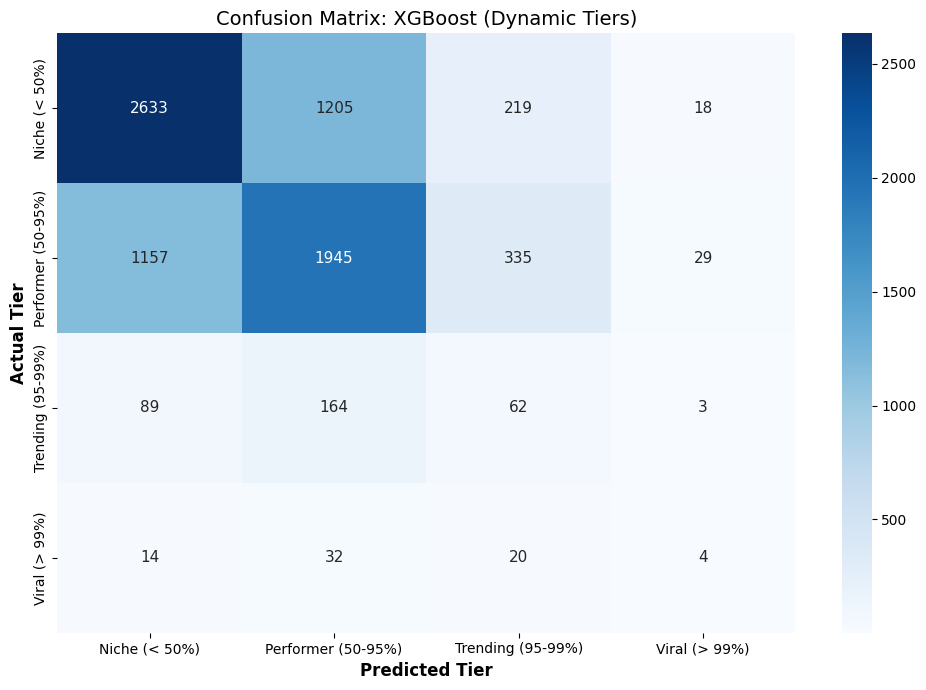

In [ ]:
# --- STEP 1: CREATE BINS ---
# Bins must cover the entire range from 0 to Infinity
bins = [-1, p50, p95, p99, float('inf')]
labels = [0, 1, 2, 3]


X_train_model = X_train.select_dtypes(include=['number'])
X_test_model = X_test.select_dtypes(include=['number'])
# Apply these specific bins to both Train and Test
y_train_dynamic = pd.cut(y_train, bins=bins, labels=labels).astype(int)
y_test_dynamic = pd.cut(y_test, bins=bins, labels=labels).astype(int)




# --- STEP 1: TRAIN WITH AUC MONITORING ---
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.11777138456676593,
    'max_depth': 4,
    'min_child_weight': 3, # Lower weight to catch rare viral hits
    'subsample': 0.6063612476638035, 'colsample_bytree': 0.8028673546901783, 'reg_alpha': 0.50990264584884, 'reg_lambda': 1.0112067447995075,
    'random_state': 42,
    'n_jobs': -1,
    'tree_method': 'hist',
    'objective': 'multi:softprob',
    'num_class': 4,
    
    # CRITICAL: We tell XGBoost to calculate AUC for us
    # It automatically handles the "One-vs-Rest" logic internally
    'eval_metric': 'auc', 
    'early_stopping_rounds': 50
}

print("Training with Multi-Class AUC...")
model_xgb = XGBClassifier(**xgb_params)


weights = compute_sample_weight(
    class_weight='balanced', 
    y=y_train_dynamic
)

model_xgb.fit(
    X_train_model, 
    y_train_dynamic, 
    sample_weight=weights, # Still use weights!
    eval_set=[(X_test_model, y_test_dynamic)],
    verbose=100
)

# --- STEP 2: CALCULATE AUC MANUALLY (For Report) ---
# We need probabilities, not just class labels
preds_AUC = model_xgb.predict_proba(X_test_model)

# Calculate Weighted AUC (favors the majority) and Macro AUC (favors the minority)
auc_score_weighted = roc_auc_score(
    y_test_dynamic, 
    preds_AUC, 
    multi_class='ovr', # One-vs-Rest
    average='weighted'
)

auc_score_macro = roc_auc_score(
    y_test_dynamic, 
    preds_AUC, 
    multi_class='ovr', 
    average='macro'
)

print("\n" + "="*50)
print("MULTI-CLASS AUC RESULTS")
print("="*50)
print(f"Weighted AUC: {auc_score_weighted:.4f} (Global Performance)")
print(f"Macro AUC:    {auc_score_macro:.4f} (Treats Viral equal to Niche)")
print("-" * 50)


evaluate_model_performance("XGBoost (Dynamic Tiers)", y_test_dynamic, preds_AUC, target_names)

## 2.LightGBM

Training LightGBM Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8453
[LightGBM] [Info] Number of data points in the train set: 31715, number of used features: 58
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

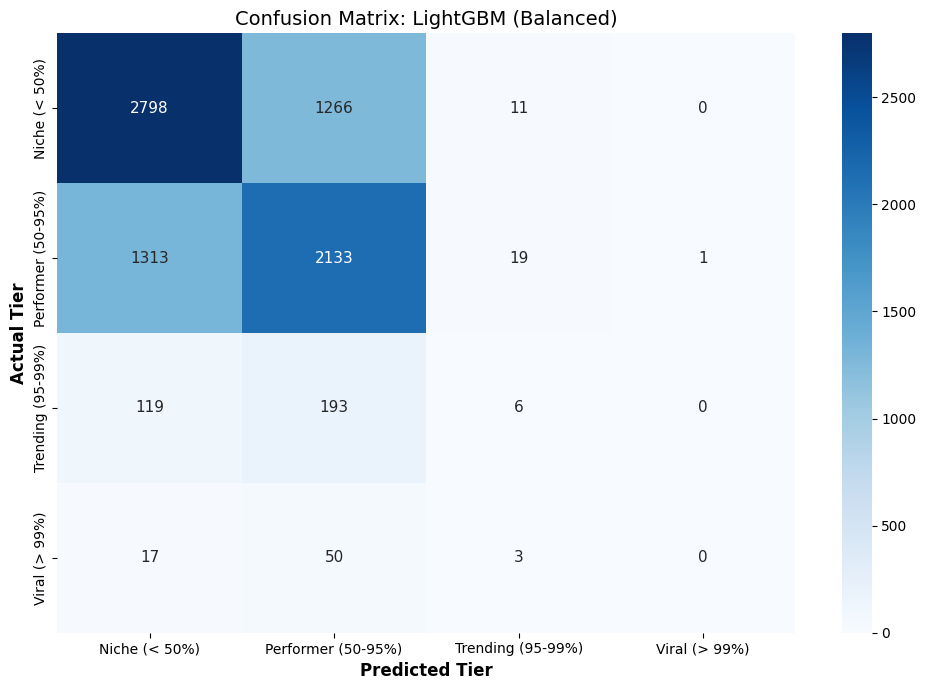

In [ ]:


# --- 1. CONFIGURE LIGHTGBM ---
# Note: LightGBM uses 'num_leaves' instead of 'max_depth'
lgbm_params = {'learning_rate': 0.16485044560925152, 'num_leaves': 60, 'min_child_samples': 44, 
               'subsample': 0.8298315525885134, 'colsample_bytree': 0.693299674599497, 'reg_alpha': 0.09193758857343017, 'reg_lambda': 5.7766296900119425,
    'n_estimators': 1000,
    'class_weight': 'balanced', # <--- BUILT-IN BALANCING! No need for external weights.
    'objective': 'multiclass',
    'num_class': 4,
    'random_state': 42,
    'n_jobs': -1
}

print("Training LightGBM Classifier...")
model_lgbm = LGBMClassifier(**lgbm_params)

# --- 2. TRAIN ---
# LightGBM is extremely fast.
model_lgbm.fit(
    X_train_model, 
    y_train_dynamic,
    eval_set=[(X_test_model, y_test_dynamic)],
    eval_metric='auc_mu', # 'auc_mu' is Multi-class AUC in LightGBM
    callbacks=[] # LightGBM generic callback placeholder (early stopping is automatic in new versions)
)

# --- 3. EVALUATE ---
preds_lgbm = model_lgbm.predict(X_test_model)

evaluate_model_performance("LightGBM (Balanced)", y_test_dynamic, preds_lgbm, target_names)

## 3.Random Forest

Training Random Forest Classifier...

PERFORMANCE REPORT: Random Forest (Balanced)
Overall Accuracy: 63.12%
-----------------------------------------------------------------------------------------------
CATEGORY                  | TOTAL ACTUAL | CORRECT HITS | HIT RATE (%) | PRECISION  | F1-SCORE  
-----------------------------------------------------------------------------------------------
Niche (< 50%)             | 4075         | 2739         | 67.21%      | 68.03%     | 0.6762
Performer (50-95%)        | 3466         | 2264         | 65.32%      | 58.14%     | 0.6152
Trending (95-99%)         | 318          | 2            | 0.63%      | 28.57%     | 0.0123
Viral (> 99%)             | 70           | 0            | 0.00%      | 0.00%     | 0.0000
-----------------------------------------------------------------------------------------------


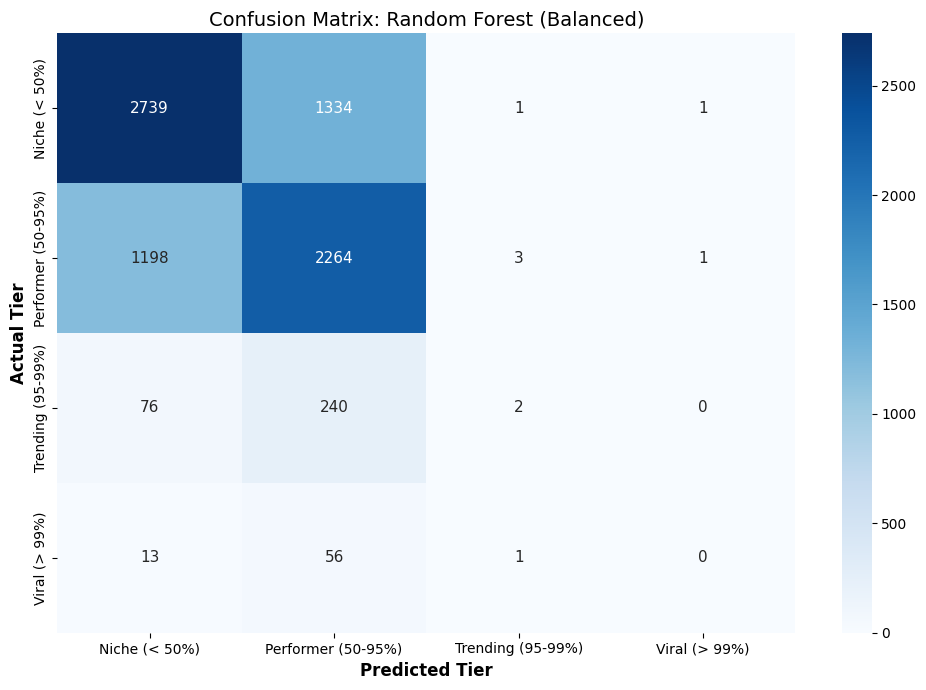

In [ ]:


# --- 1. CONFIGURE RANDOM FOREST ---
# These parameters are typical "Tuned" values for noisy data
rf_params = {
    'n_estimators': 1000,        # More trees = More stability
    'max_depth': 20,            # Deep enough to find patterns, but not infinite
    'min_samples_leaf': 4,      # Crucial: Requires 4 articles to make a rule (Filters noise)
    'max_features': 'sqrt',     # Standard for classification
    'class_weight': 'balanced', # <--- CRITICAL: Forces it to care about Viral hits
    'random_state': 42,
    'n_jobs': -1                # Use all CPU cores
}

print("Training Random Forest Classifier...")
model_rf = RandomForestClassifier(**rf_params)

# --- 2. TRAIN ---
# Random Forest does not support 'eval_set' or 'early_stopping' natively
# It trains until all trees are built.
model_rf.fit(X_train_model, y_train_dynamic)

# --- 3. EVALUATE ---
preds_rf = model_rf.predict(X_test_model)

# Use your custom evaluation function
evaluate_model_performance("Random Forest (Balanced)", y_test_dynamic, preds_rf, target_names)

## 4.Adaboost

Training AdaBoost Classifier...

PERFORMANCE REPORT: AdaBoost (Balanced Tree)
Overall Accuracy: 42.92%
-----------------------------------------------------------------------------------------------
CATEGORY                  | TOTAL ACTUAL | CORRECT HITS | HIT RATE (%) | PRECISION  | F1-SCORE  
-----------------------------------------------------------------------------------------------
Niche (< 50%)             | 4075         | 2353         | 57.74%      | 64.75%     | 0.6105
Performer (50-95%)        | 3466         | 918          | 26.49%      | 55.43%     | 0.3585
Trending (95-99%)         | 318          | 94           | 29.56%      | 6.47%     | 0.1062
Viral (> 99%)             | 70           | 38           | 54.29%      | 3.20%     | 0.0605
-----------------------------------------------------------------------------------------------


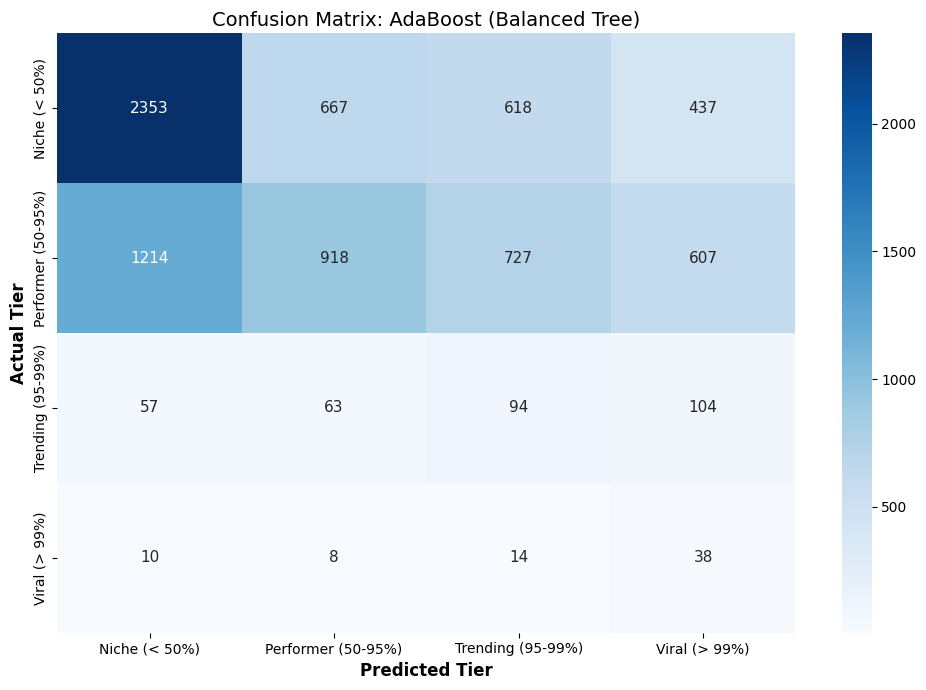

In [ ]:


# --- 1. CONFIGURE THE BASE ESTIMATOR (The Tree) ---
# Parameters like depth and leaf size go HERE
base_estimator = DecisionTreeClassifier(
    max_depth=5,                # Your value
    min_samples_leaf=18,        # Your value
    class_weight='balanced',    # Critical for Viral rarity
    random_state=42
)

# --- 2. CONFIGURE THE BOOSTER (AdaBoost) ---
# Parameters like n_estimators and learning_rate go HERE
ada_params = {
    'estimator': base_estimator,
    'n_estimators': 319,               # Your value (Moved from tree to here)
    'learning_rate': 0.08065774280726207, # Your value (Moved from tree to here)
    'algorithm': 'SAMME',
    'random_state': 42
}

print("Training AdaBoost Classifier...")
model_ada = AdaBoostClassifier(**ada_params)

# --- 3. TRAIN ---
model_ada.fit(X_train_model, y_train_dynamic)

# --- 4. EVALUATE ---
preds_ada = model_ada.predict(X_test_model)

evaluate_model_performance("AdaBoost (Balanced Tree)", y_test_dynamic, preds_ada, target_names)

## 5.Naive Bayes

Training Naive Bayes Classifier (with Power Transformation)...

PERFORMANCE REPORT: Naive Bayes (Transformed)
Overall Accuracy: 57.76%
-----------------------------------------------------------------------------------------------
CATEGORY                  | TOTAL ACTUAL | CORRECT HITS | HIT RATE (%) | PRECISION  | F1-SCORE  
-----------------------------------------------------------------------------------------------
Niche (< 50%)             | 4075         | 3327         | 81.64%      | 58.66%     | 0.6827
Performer (50-95%)        | 3466         | 1223         | 35.29%      | 61.71%     | 0.4490
Trending (95-99%)         | 318          | 25           | 7.86%      | 11.79%     | 0.0943
Viral (> 99%)             | 70           | 5            | 7.14%      | 7.94%     | 0.0752
-----------------------------------------------------------------------------------------------


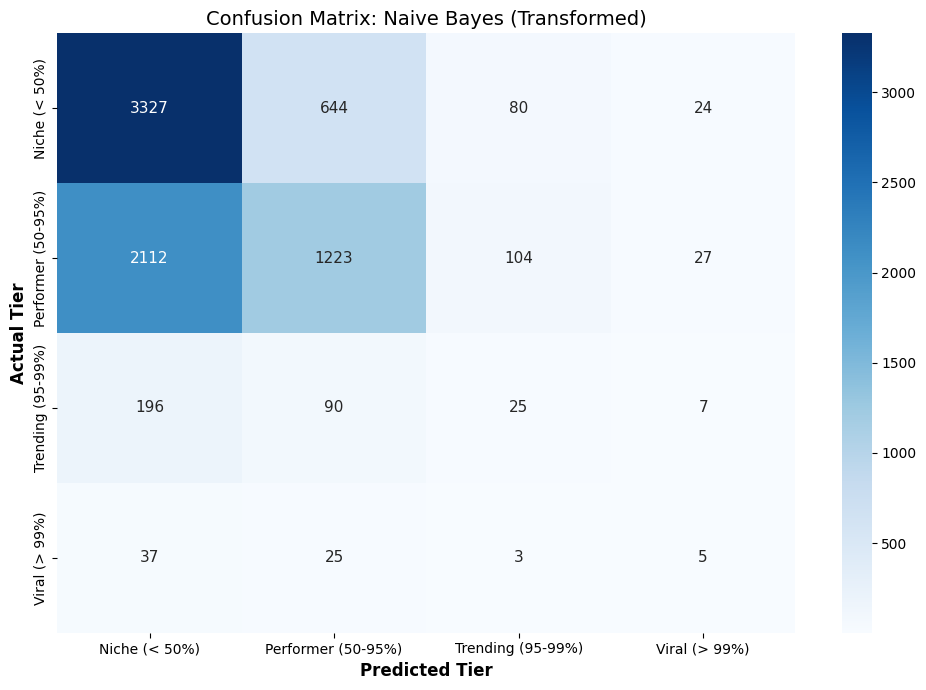

In [ ]:


# --- 1. CONFIGURE NAIVE BAYES ---
# We use a Pipeline to transform the data BEFORE the model sees it.
# PowerTransformer (Yeo-Johnson) fixes the skewness automatically.
nb_pipeline = make_pipeline(
    PowerTransformer(),  # <--- CRITICAL: Makes data "Normal" for Naive Bayes
    GaussianNB(
        var_smoothing=0.911360934123901 # Standard default, can be tuned
    )
)

print("Training Naive Bayes Classifier (with Power Transformation)...")

# --- 2. TRAIN ---
# Naive Bayes does not handle 'class_weight' natively.
# However, because it calculates probabilities based on distribution, 
# it naturally handles imbalance better than Trees in some cases.
# To force "Viral Aggression", we can use 'prior' adjustments or just rely on its nature.
nb_pipeline.fit(X_train_model, y_train_dynamic)

# --- 3. EVALUATE ---
preds_nb = nb_pipeline.predict(X_test_model)

evaluate_model_performance("Naive Bayes (Transformed)", y_test_dynamic, preds_nb, target_names)

## 6. Stacked ensemble

Building Stacking Classifier (Clean version)...


/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8453
[LightGBM] [Info] Number of data points in the train set: 31715, number of used features: 58
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/yuvaraj/Library/Python/3.9/lib/python/site-packages/sklea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8440
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 58
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8431
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 58
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training f

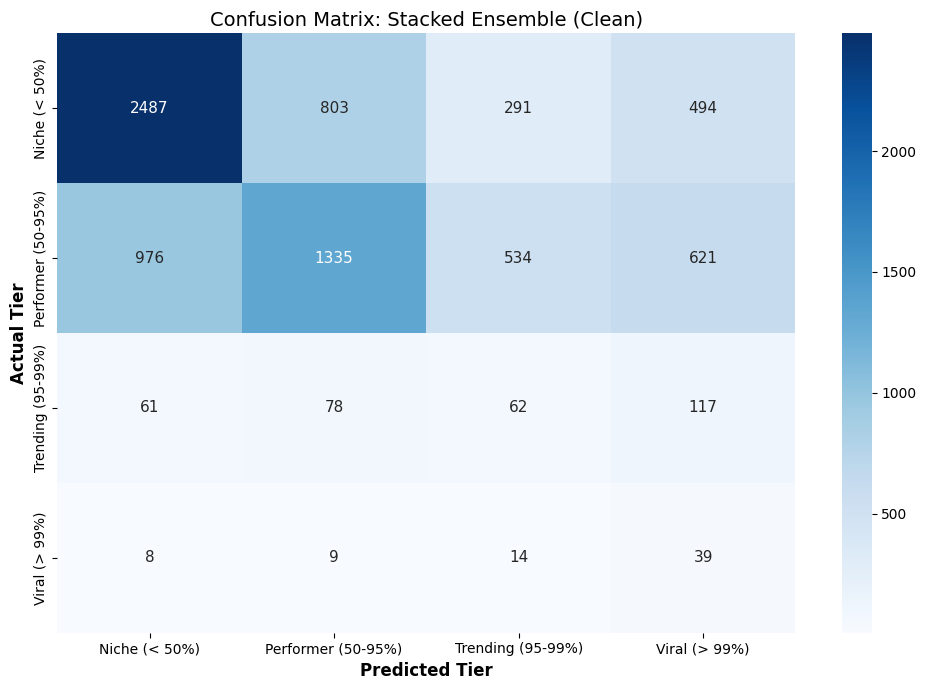

In [ ]:


# --- A. Prepare Clean XGBoost ---
# We take your tuned params but REMOVE early stopping
xgb_params_clean = model_xgb.get_params()
if 'early_stopping_rounds' in xgb_params_clean:
    del xgb_params_clean['early_stopping_rounds'] # Remove it
# Ensure n_estimators is sufficient since we can't stop early
xgb_params_clean['n_estimators'] = 500 

xgb_clean = XGBClassifier(**xgb_params_clean)

# --- B. Prepare Clean LightGBM ---
# LightGBM might have callbacks for early stopping, we need to clear them or set n_estimators
lgbm_params_clean = model_lgbm.get_params()
# Remove early stopping if it was set in constructor or just rely on fixed estimators
lgbm_clean = LGBMClassifier(**lgbm_params_clean)
lgbm_clean.set_params(n_estimators=500, early_stopping_round=None, callbacks=None)

# --- C. Define the Team ---
estimators = [
    ('xgb', xgb_clean),       # Clean version
    ('lgbm', lgbm_clean),     # Clean version
    ('rf', model_rf),         # Random Forest (doesn't use early stopping anyway)
    ('ada', model_ada),       # AdaBoost (doesn't use early stopping)
    ('nb', nb_pipeline)       # Naive Bayes (doesn't use early stopping)
]

# --- D. Define the Boss ---
final_layer = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

# --- E. Build & Train Stack ---
print("Building Stacking Classifier (Clean version)...")
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_layer,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# This will now work because XGBoost won't ask for a validation set
stacking_model.fit(X_train_model, y_train_dynamic)

# --- F. Evaluate ---
print("\nPredicting with Stacked Model...")
preds_stack = stacking_model.predict(X_test_model)

evaluate_model_performance(
    "Stacked Ensemble (Clean)", 
    y_test_dynamic, 
    preds_stack, 
    target_names
)

# 5-evaluation-and-analysis

### Feature Contribution

Extracting Built-in Importance...
Calculating Permutation Importance (Sampled)...
Processing Naive Bayes...


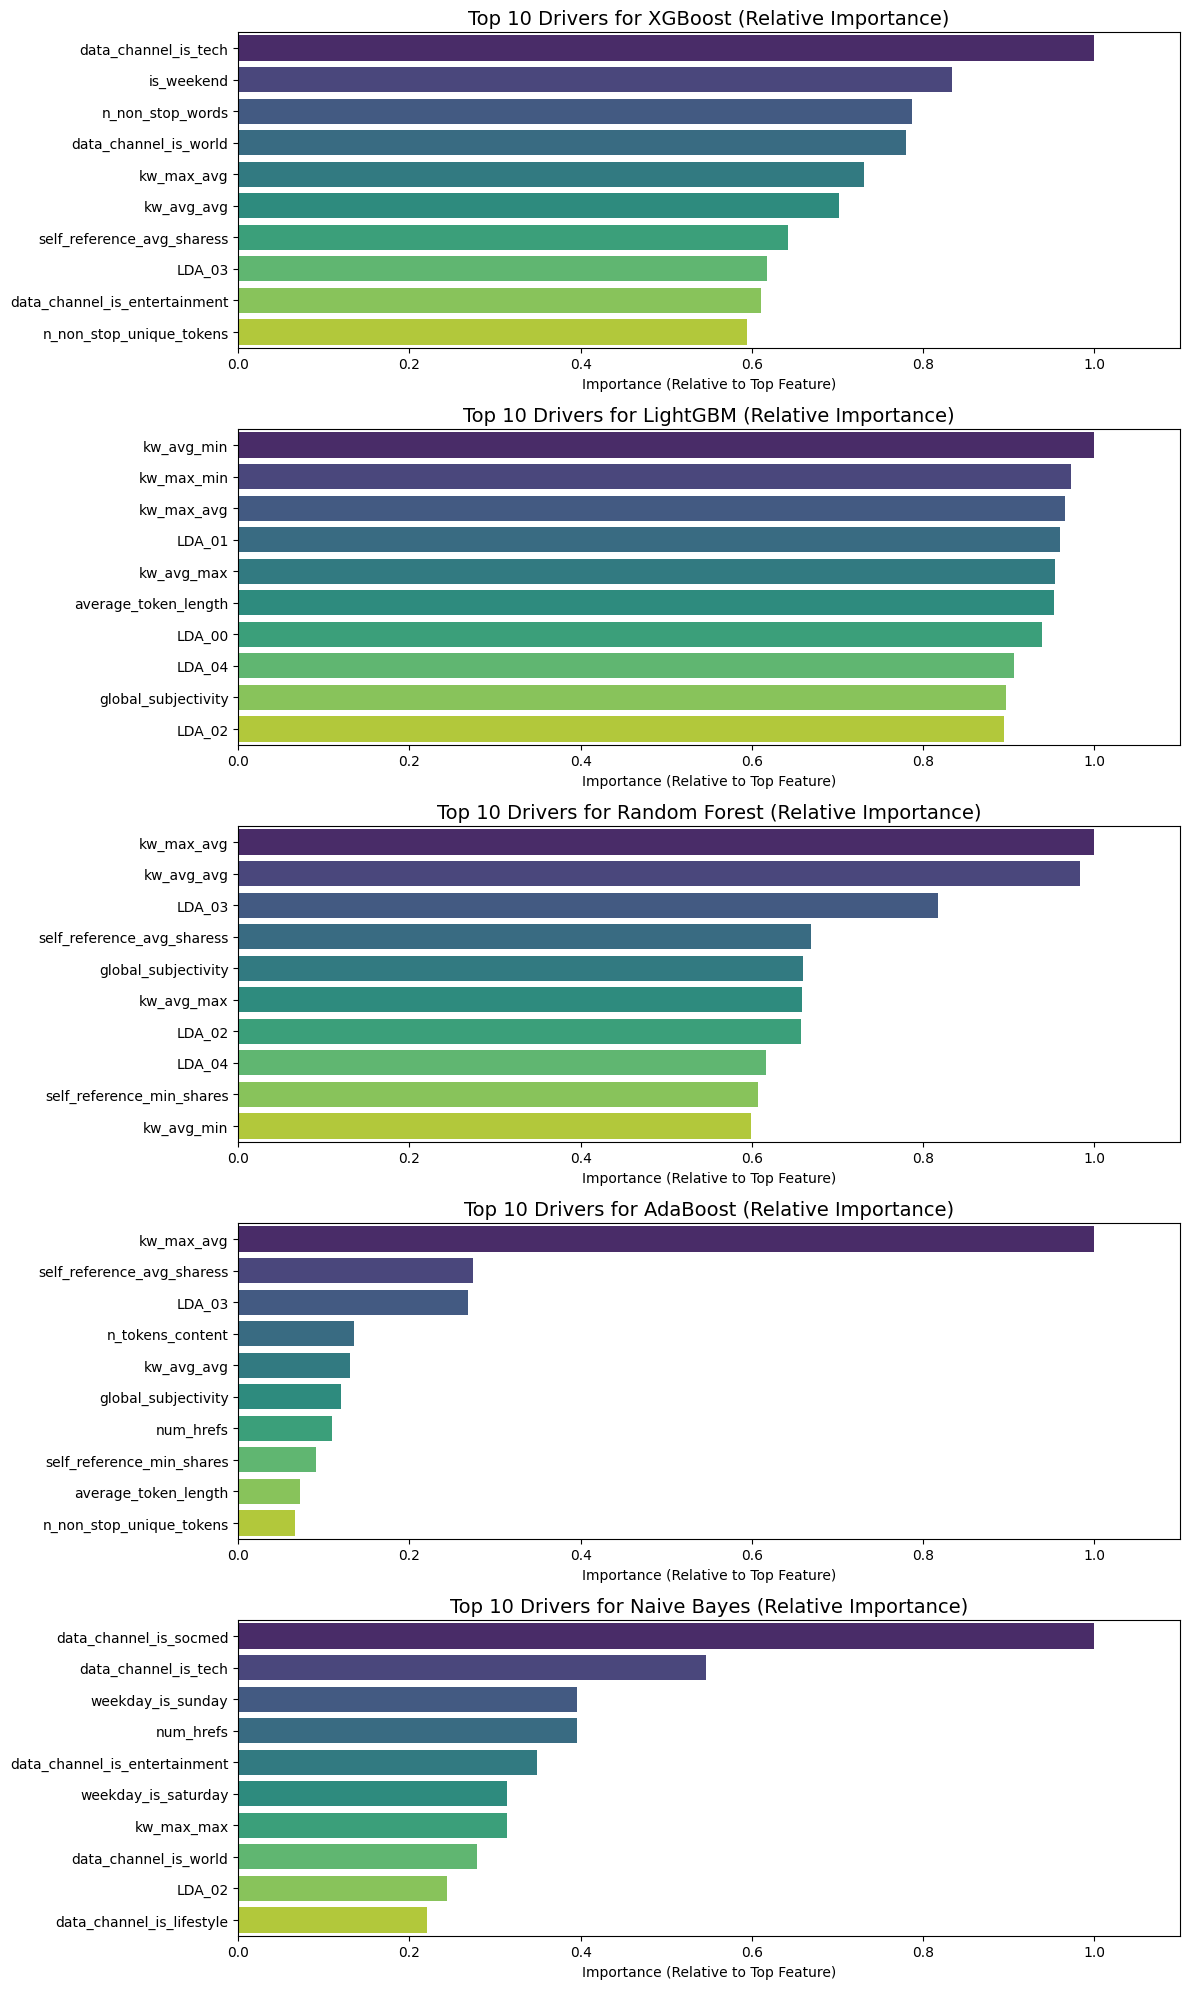

In [ ]:


# 1. ORGANIZE MODELS
tree_models = {
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm,
    "Random Forest": model_rf,
    "AdaBoost": model_ada
}

other_models = {
    "Naive Bayes": nb_pipeline
}

all_importance = []

# --- PART A: FAST METHOD (Tree Built-in) ---
print("Extracting Built-in Importance...")

for name, model in tree_models.items():
    try:
        # Extract based on model type
        if hasattr(model, 'feature_importances_'):
            imps = model.feature_importances_
        elif hasattr(model, 'named_steps'): 
             # Handle pipelines (if any tree models are wrapped)
             clf = model.steps[-1][1]
             imps = clf.feature_importances_
        else:
            continue

        # NORMALIZE SCORES (Max value = 1.0)
        # This fixes the scale issue between different math formulas
        max_score = imps.max()
        if max_score > 0:
            imps = imps / max_score

        for i, feat_name in enumerate(X_test_model.columns):
            all_importance.append({
                'Model': name,
                'Feature': feat_name,
                'Importance': imps[i]
            })
    except Exception as e:
        print(f"Skipping {name}: {e}")

# --- PART B: PERMUTATION METHOD (Normalized) ---
print("Calculating Permutation Importance (Sampled)...")
X_sample = X_test_model.sample(1000, random_state=42)
y_sample = y_test_dynamic.loc[X_sample.index]

for name, model in other_models.items():
    print(f"Processing {name}...")
    result = permutation_importance(
        model, X_sample, y_sample, 
        n_repeats=5, 
        random_state=42, 
        n_jobs=-1
    )
    
    # NORMALIZE SCORES
    imps = result.importances_mean
    max_score = imps.max()
    if max_score > 0:
        imps = imps / max_score
    
    for i, feat_name in enumerate(X_test_model.columns):
        all_importance.append({
            'Model': name,
            'Feature': feat_name,
            'Importance': imps[i]
        })

# --- PART C: VISUALIZE (Same Scale) ---
df_imp = pd.DataFrame(all_importance)
unique_models = df_imp['Model'].unique()

plt.figure(figsize=(12, 4 * len(unique_models)))

for i, model_name in enumerate(unique_models):
    plt.subplot(len(unique_models), 1, i + 1)
    
    # Get Top 10
    data_subset = df_imp[df_imp['Model'] == model_name].sort_values(by='Importance', ascending=False).head(10)
    
    sns.barplot(x='Importance', y='Feature', data=data_subset, palette='viridis')
    
    plt.title(f'Top 10 Drivers for {model_name} (Relative Importance)', fontsize=14)
    plt.xlabel('Importance (Relative to Top Feature)', fontsize=10)
    plt.ylabel('')
    
    # SET SAME SCALE FOR ALL CHARTS
    # Since we normalized everything, 0 to 1.1 covers everything perfectly
    plt.xlim(0, 1.1) 

plt.tight_layout()
plt.show()

# Additional code (only for reference)

## Tuning code

In [32]:
import optuna

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight

# 1. CALCULATE WEIGHTS (Crucial context for the tuner)
weights = compute_sample_weight(class_weight='balanced', y=y_train_dynamic)

def objective(trial):
    # --- A. Define the Search Space ---
    params = {
        # Core Parameters
        'n_estimators': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        
        # Outlier Handling (Critical for Viral hits)
        # We allow smaller child weights to catch rare viral clusters
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 8),
        
        # Regularization (To prevent memorizing noise)
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0, log=True),
        
        # Fixed settings
        'random_state': 42,
        'n_jobs': -1,
        'tree_method': 'hist',
        'objective': 'multi:softprob',
        'num_class': 4,
        'eval_metric': 'auc',
        'early_stopping_rounds': 50
    }
    
    # --- B. Train the Model ---
    model = XGBClassifier(**params)
    
    model.fit(
        X_train_model, 
        y_train_dynamic,
        sample_weight=weights,  # <--- CRITICAL: Tune using the weighted logic
        eval_set=[(X_test_model, y_test_dynamic)],
        verbose=0
    )
    
    # --- C. Custom Evaluation (Maximize Viral F1) ---
    preds = model.predict(X_test_model)
    
    # Calculate F1 score specifically for Class 3 (Viral)
    # average=None gives [F1_Class0, F1_Class1, F1_Class2, F1_Class3]
    f1_scores = f1_score(y_test_dynamic, preds, average=None, zero_division=0)
    viral_f1 = f1_scores[3] 
    
    # We can also optimize for (Viral F1 + Trending F1) / 2 if you want both
    # trending_f1 = f1_scores[2]
    # return (viral_f1 + trending_f1) / 2
    
    return viral_f1

# --- D. Run the Optimization ---
print("Starting Hyperparameter Tuning for VIRAL DETECTION...")
# We use direction='maximize' because we want Higher F1 Score
study = optuna.create_study(direction='maximize') 
study.optimize(objective, n_trials=30) # 30 Trials is a good balance of speed/results

print("\n" + "="*50)
print("BEST HYPERPARAMETERS FOUND:")
print("="*50)
print(study.best_params)
print(f"Best Viral F1 Score: {study.best_value:.4f}")

[I 2025-11-29 23:06:54,510] A new study created in memory with name: no-name-dfe67b54-b42d-4484-8222-9cf0e4ee5bcd


Starting Hyperparameter Tuning for VIRAL DETECTION...


[I 2025-11-29 23:07:01,005] Trial 0 finished with value: 0.03322259136212625 and parameters: {'learning_rate': 0.030400707202722095, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.8140526173072848, 'colsample_bytree': 0.9569542346342468, 'reg_alpha': 4.049077958863487, 'reg_lambda': 0.1420806738043722}. Best is trial 0 with value: 0.03322259136212625.
[I 2025-11-29 23:07:04,238] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.19427625690977696, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.843036705714794, 'colsample_bytree': 0.9570800307686307, 'reg_alpha': 0.03655566762011286, 'reg_lambda': 0.0260832614866867}. Best is trial 0 with value: 0.03322259136212625.
[I 2025-11-29 23:07:09,370] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.08297290330981275, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.6879933106880286, 'colsample_bytree': 0.7231229817350083, 'reg_alpha': 0.2342754141157885, 'reg_lambda': 5.988995178258414}


BEST HYPERPARAMETERS FOUND:
{'learning_rate': 0.045306388158680516, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.7703082678213902, 'colsample_bytree': 0.8183496054843995, 'reg_alpha': 0.012003463442738416, 'reg_lambda': 0.025843019241612523}
Best Viral F1 Score: 0.0515


In [34]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import f1_score

def objective_lgbm(trial):
    # --- A. Search Space ---
    params = {
        'n_estimators': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        
        # num_leaves: The complexity control. 
        # Higher = More Viral Hits, but more Overfitting.
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0, log=True),
        
        # Fixed
        'class_weight': 'balanced',
        'objective': 'multiclass',
        'num_class': 4,
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }
    
    model = LGBMClassifier(**params)
    
    # --- B. Train ---
    # We use a callback for early stopping
    model.fit(
        X_train_model, 
        y_train_dynamic,
        eval_set=[(X_test_model, y_test_dynamic)],
        eval_metric='auc_mu',
        callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
    )
    
    # --- C. Optimize for Viral F1 ---
    preds = model.predict(X_test_model)
    f1_scores = f1_score(y_test_dynamic, preds, average=None, zero_division=0)
    viral_f1 = f1_scores[3] 
    
    return viral_f1

print("Starting LightGBM Tuning...")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=30)

print("\nBEST LIGHTGBM PARAMS:")
print(study_lgbm.best_params)

[I 2025-11-29 23:09:58,690] A new study created in memory with name: no-name-efc115a9-3dd7-431a-873c-092ff3c2bdf0


Starting LightGBM Tuning...


[I 2025-11-29 23:09:59,695] Trial 0 finished with value: 0.038461538461538464 and parameters: {'learning_rate': 0.24150665342152364, 'num_leaves': 26, 'min_child_samples': 32, 'subsample': 0.9851866713611297, 'colsample_bytree': 0.9847298562667572, 'reg_alpha': 0.012965623279870591, 'reg_lambda': 0.020044708333464643}. Best is trial 0 with value: 0.038461538461538464.
[I 2025-11-29 23:10:06,755] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.11500664926522508, 'num_leaves': 91, 'min_child_samples': 13, 'subsample': 0.7488408624516563, 'colsample_bytree': 0.974317740823113, 'reg_alpha': 0.2398693877885998, 'reg_lambda': 0.020319673733133994}. Best is trial 0 with value: 0.038461538461538464.
[I 2025-11-29 23:10:08,141] Trial 2 finished with value: 0.051351351351351354 and parameters: {'learning_rate': 0.0831439964596283, 'num_leaves': 26, 'min_child_samples': 39, 'subsample': 0.9313727573019516, 'colsample_bytree': 0.6397782350008651, 'reg_alpha': 9.956738787427893


BEST LIGHTGBM PARAMS:
{'learning_rate': 0.06955236764638185, 'num_leaves': 81, 'min_child_samples': 37, 'subsample': 0.6023496417255091, 'colsample_bytree': 0.870954159721603, 'reg_alpha': 3.0588002966298684, 'reg_lambda': 1.0217968173749326}


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

def objective_rf_viral(trial):
    # --- 1. Define Search Space ---
    params = {
        # n_estimators: More trees = Smoother predictions (but slower)
        'n_estimators': trial.suggest_int('n_estimators', 200, 800),
        
        # max_depth: Limits how complex the trees can get
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        
        # min_samples_split: Minimum samples required to split an internal node
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        
        # min_samples_leaf: CRITICAL. 
        # Higher values (e.g., 5-10) smooth out noise and stop overfitting.
        # Lower values (e.g., 1) capture specific viral outliers.
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        
        # max_features: 'sqrt' is standard, 'log2' uses fewer features (more diversity)
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        
        # class_weight: 'balanced' or 'balanced_subsample'
        # 'balanced_subsample' calculates weights for every tree individually (More aggressive)
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample']),
        
        # Fixed
        'random_state': 42,
        'n_jobs': -1
    }
    
    # --- 2. Train ---
    model = RandomForestClassifier(**params)
    model.fit(X_train_model, y_train_dynamic)
    
    # --- 3. Evaluate (Maximize Viral F1) ---
    preds = model.predict(X_test_model)
    
    # Calculate F1 specifically for Class 3 (Viral)
    _, _, f1_scores, _ = precision_recall_fscore_support(y_test_dynamic, preds, average=None, zero_division=0)
    viral_f1 = f1_scores[3]
    
    return viral_f1

print("Starting Random Forest Viral Tuning...")
study_rf_viral = optuna.create_study(direction='maximize') 
study_rf_viral.optimize(objective_rf_viral, n_trials=30)

print("\nBEST RANDOM FOREST PARAMS:")
print(study_rf_viral.best_params)

[I 2025-11-29 23:11:31,961] A new study created in memory with name: no-name-28c0b015-3722-4395-9cfe-00819e24e2c2


Starting Random Forest Viral Tuning...


[I 2025-11-29 23:11:43,345] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 754, 'max_depth': 46, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.0.
[I 2025-11-29 23:11:50,700] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 419, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.0.
[I 2025-11-29 23:11:56,218] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 309, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.0.
[I 2025-11-29 23:12:00,661] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 242, 'max_depth': 48, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 0


BEST RANDOM FOREST PARAMS:
{'n_estimators': 754, 'max_depth': 46, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'class_weight': 'balanced_subsample'}


In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

def objective_ada_viral(trial):
    # --- 1. Tune the Base Estimator (The Tree) ---
    # AdaBoost usually uses Depth=1 (Stumps), but for complex Viral rules, we try deeper.
    tree_depth = trial.suggest_int('tree_depth', 1, 8)
    
    # We tune min_samples_leaf to prevent the tree from memorizing noise
    leaf_size = trial.suggest_int('min_samples_leaf', 1, 20)
    
    base_tree = DecisionTreeClassifier(
        max_depth=tree_depth,
        min_samples_leaf=leaf_size,
        class_weight='balanced', # <--- CRITICAL: Force the tree to find Viral hits
        random_state=42
    )
    
    # --- 2. Tune the AdaBoost Wrapper ---
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'algorithm': 'SAMME', # Fixed for newer Scikit-Learn
        'random_state': 42
    }
    
    # --- 3. Train ---
    model = AdaBoostClassifier(estimator=base_tree, **params)
    model.fit(X_train_model, y_train_dynamic)
    
    # --- 4. Evaluate (Maximize Viral F1) ---
    preds = model.predict(X_test_model)
    
    # Calculate F1 specifically for Class 3 (Viral)
    _, _, f1_scores, _ = precision_recall_fscore_support(y_test_dynamic, preds, average=None, zero_division=0)
    viral_f1 = f1_scores[3]
    
    return viral_f1

print("Starting AdaBoost Viral Tuning...")
study_ada_viral = optuna.create_study(direction='maximize') # Higher F1 is better
study_ada_viral.optimize(objective_ada_viral, n_trials=30)

print("\nBEST ADABOOST PARAMS:")
print(study_ada_viral.best_params)

[I 2025-11-29 23:15:20,603] A new study created in memory with name: no-name-58e7ed1e-cafa-456d-917e-280ee5832c52


Starting AdaBoost Viral Tuning...


[I 2025-11-29 23:16:14,163] Trial 0 finished with value: 0.026107425636635994 and parameters: {'tree_depth': 1, 'min_samples_leaf': 3, 'n_estimators': 719, 'learning_rate': 0.08101215931077241}. Best is trial 0 with value: 0.026107425636635994.
[I 2025-11-29 23:18:12,768] Trial 1 finished with value: 0.02865329512893983 and parameters: {'tree_depth': 8, 'min_samples_leaf': 12, 'n_estimators': 953, 'learning_rate': 0.03634518925368457}. Best is trial 1 with value: 0.02865329512893983.
[I 2025-11-29 23:21:39,242] Trial 2 finished with value: 0.03164556962025317 and parameters: {'tree_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 648, 'learning_rate': 0.02053801012439883}. Best is trial 2 with value: 0.03164556962025317.
[I 2025-11-29 23:21:44,385] Trial 3 finished with value: 0.04302567661346287 and parameters: {'tree_depth': 4, 'min_samples_leaf': 18, 'n_estimators': 637, 'learning_rate': 0.09949039931895795}. Best is trial 3 with value: 0.04302567661346287.
[I 2025-11-29 23:23:26,0


BEST ADABOOST PARAMS:
{'tree_depth': 5, 'min_samples_leaf': 12, 'n_estimators': 485, 'learning_rate': 0.013114266189401223}


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_fscore_support

def objective_nb_viral(trial):
    # --- 1. Define Search Space ---
    # var_smoothing: Added variance to calculation stability.
    # High value = Smoother curve (Less overfitting).
    # Low value = Exact curve (More aggressive).
    smoothing = trial.suggest_float('var_smoothing', 1e-10, 1.0, log=True)
    
    # --- 2. Build Pipeline ---
    model = make_pipeline(
        PowerTransformer(), # Always keep this for your data
        GaussianNB(var_smoothing=smoothing)
    )
    
    # --- 3. Train ---
    model.fit(X_train_model, y_train_dynamic)
    
    # --- 4. Evaluate (Maximize Viral F1) ---
    preds = model.predict(X_test_model)
    _, _, f1_scores, _ = precision_recall_fscore_support(y_test_dynamic, preds, average=None, zero_division=0)
    viral_f1 = f1_scores[3]
    
    return viral_f1

print("Starting Naive Bayes Viral Tuning...")
study_nb = optuna.create_study(direction='maximize')
study_nb.optimize(objective_nb_viral, n_trials=20) # Very fast to tune

print("\nBEST NB PARAMS:")
print(study_nb.best_params)

[I 2025-11-29 23:45:14,203] A new study created in memory with name: no-name-57a403ec-5010-465c-a515-17e9290235f0


Starting Naive Bayes Viral Tuning...


[I 2025-11-29 23:45:14,802] Trial 0 finished with value: 0.05194805194805195 and parameters: {'var_smoothing': 0.014396856084588754}. Best is trial 0 with value: 0.05194805194805195.
[I 2025-11-29 23:45:15,374] Trial 1 finished with value: 0.05091937765205092 and parameters: {'var_smoothing': 7.86194884641437e-07}. Best is trial 0 with value: 0.05194805194805195.
[I 2025-11-29 23:45:15,992] Trial 2 finished with value: 0.05091937765205092 and parameters: {'var_smoothing': 1.0772437525192276e-05}. Best is trial 0 with value: 0.05194805194805195.
[I 2025-11-29 23:45:16,574] Trial 3 finished with value: 0.05091937765205092 and parameters: {'var_smoothing': 4.4431563434632204e-05}. Best is trial 0 with value: 0.05194805194805195.
[I 2025-11-29 23:45:17,171] Trial 4 finished with value: 0.05091937765205092 and parameters: {'var_smoothing': 8.171102287857293e-05}. Best is trial 0 with value: 0.05194805194805195.
[I 2025-11-29 23:45:17,754] Trial 5 finished with value: 0.05091937765205092 and


BEST NB PARAMS:
{'var_smoothing': 0.34669708337580335}
